In [1]:
# importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/Top/Fraud_check.csv")
    return data
data= read_data()
print(data.head())

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [3]:
data.copy()
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.shape

(600, 6)

<Axes: >

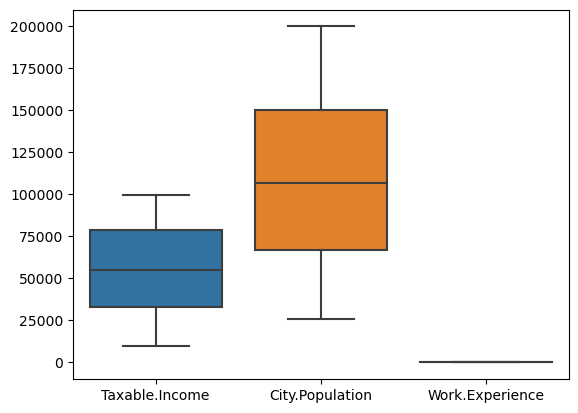

In [9]:
##Exploratory Data Analysis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
sns.boxplot(data=data.loc[:, ['Taxable.Income', 'City.Population', 'Work.Experience']])

<Axes: xlabel='Work.Experience', ylabel='City.Population'>

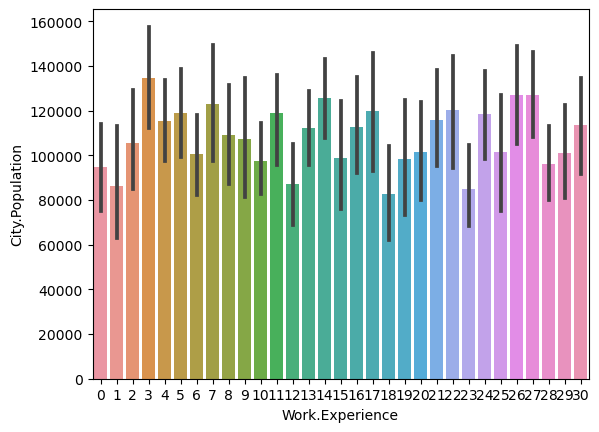

In [11]:
sns.barplot(x="Work.Experience",y="City.Population",data=data)

<Axes: xlabel='City.Population', ylabel='Taxable.Income'>

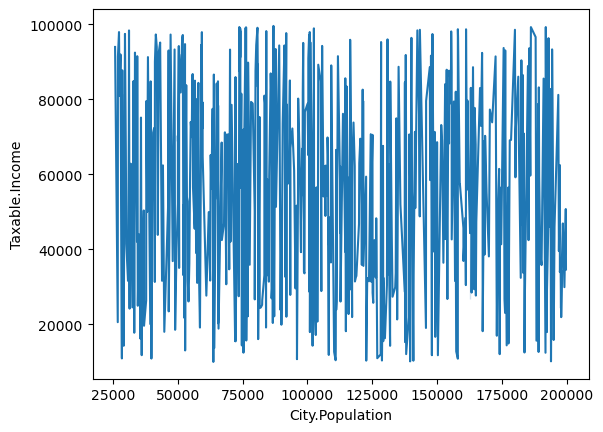

In [12]:
sns.lineplot(x="City.Population",y=data["Taxable.Income"],data=data)

In [13]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
data["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [16]:
 data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [17]:
FC = pd.get_dummies(data.drop(columns = ["TaxInc"]))

In [19]:
data_final = pd.concat([FC,data["TaxInc"]], axis = 1)

In [26]:
colnames = list(data_final.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [29]:
predictors = colnames[:10]
predictors

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [30]:
target = colnames[10]
target

'TaxInc'

In [31]:
X = data_final[predictors]
X.shape

(600, 10)

In [32]:
Y = data_final[target]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [33]:
# sampling the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state =1234)

In [34]:
X_test

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
570,55981,161629,29,1,0,0,0,1,0,1
380,36156,197699,2,0,1,0,1,0,1,0
457,11804,36055,24,1,0,0,1,0,0,1
66,42507,66985,12,0,1,0,1,0,0,1
62,91684,147684,13,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
508,46002,195357,19,1,0,0,0,1,1,0
344,49771,192313,5,1,0,0,1,0,0,1
575,10735,95975,13,1,0,1,0,0,0,1
321,38670,84215,6,1,0,0,0,1,0,1


In [35]:
# featuring scaling--
sc = StandardScaler()

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =1234)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1234)

In [40]:
classifier.score(X_test, Y_test)

1.0

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good'

In [42]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[92  0]
 [ 0 28]]


In [43]:
accuracy_score(Y_test, y_pred)

1.0

In [44]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
classifier.score(X_test, Y_test)

1.0